In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler


In [4]:
#  Create a synthetic imbalanced dataset
np.random.seed(42)
X = np.random.rand(1000, 10)  
y = np.concatenate([np.zeros(900), np.ones(100)])  


In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Define sampling techniques
sampling_techniques = {
    'Sampling1': SMOTE(random_state=42),  
    'Sampling2': RandomUnderSampler(random_state=42),  
    'Sampling3': SMOTETomek(random_state=42),  
    'Sampling4': RandomOverSampler(random_state=42), 
    'Sampling5': None  # No sampling (baseline)
}

In [6]:
# Define machine learning models
models = {
    'M1': RandomForestClassifier(random_state=42),
    'M2': LogisticRegression(random_state=42),
    'M3': SVC(random_state=42),
    'M4': DecisionTreeClassifier(random_state=42),
    'M5': KNeighborsClassifier()
}

In [7]:
#  Apply sampling techniques and evaluate models
results = pd.DataFrame(columns=sampling_techniques.keys(), index=models.keys())

for model_name, model in models.items():
    for sampling_name, sampler in sampling_techniques.items():
        if sampler is not None:
            X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        else:
            X_resampled, y_resampled = X_train, y_train  # No sampling

        # Train the model
        model.fit(X_resampled, y_resampled)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store the result
        results.loc[model_name, sampling_name] = accuracy


In [8]:
print("Accuracy Results:")
print(results)


best_sampling = results.idxmax(axis=1)
print("\nBest Sampling Technique for Each Model:")
print(best_sampling)


Accuracy Results:
   Sampling1 Sampling2 Sampling3 Sampling4 Sampling5
M1      0.83  0.553333  0.823333  0.883333  0.883333
M2  0.523333  0.513333  0.523333      0.52  0.883333
M3      0.73  0.426667      0.73  0.693333  0.883333
M4  0.753333      0.41  0.753333  0.793333      0.76
M5  0.583333      0.46      0.58      0.69  0.873333

Best Sampling Technique for Each Model:
M1    Sampling4
M2    Sampling5
M3    Sampling5
M4    Sampling4
M5    Sampling5
dtype: object


<Figure size 1000x600 with 0 Axes>

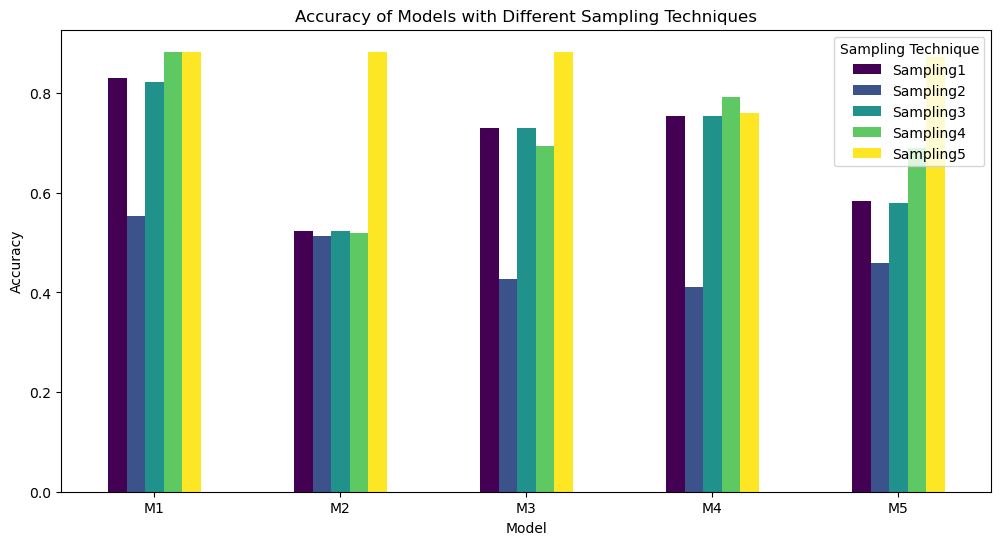

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
results.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Accuracy of Models with Different Sampling Techniques')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.legend(title='Sampling Technique')
plt.show()